<h2 style="text-align: center;">CENG222</h2>
<h3 style="text-align: center;">Probability and Statistics</h3>
<h3 style="text-align: center;">Term Project for 2022-2023 Spring</h3>

### DUE DATE: 26.06.2023 - 23:59

<u>IMPORTANT NOTES:</u>
1. A lecture on Python, NumPy, and Pyplot focusing on this term project will be given next week. Notes from that lecture will also be available for you.
2. This is **NOT** a group activity. You can discuss some points with your friends, but each student will submit and be graded **individually**. If you want to be safe rather than sorry, you should consult with the **course assistants** as your primary and with the **instructor** as your secondary source of knowledge.
3. The Jupyter Notebook scripts and the reports will be processed manually and automatically to detect plagiarism and cheating. Again: You should be careful about the level of cooperation with your friends. In case of cheating, all parties will be punished equally.
4. Your Jupyter Notebook script should be named **studentid.ipynb (not .py!)**, and your report **studentid.pdf.**
5. If your report is hand-written, the responsibility is yours to make it as legible as possible. Illegible parts will not be graded.
6. Once the projects are graded, you will receive detailed feedback about your submission. There will be a grace period for your objections.

<u>NOTES on Jupyter Notebook</u>
1. You can use additional cells to implement your code.
2. Don't forget to import necessary libraries.
3. **IMPORTANT** When you are submiting your work, you must upload as an **.ipynb** file. So, if you are using Google Colab, you should download your code as Jupyter Notebook **.ipynb** file.

### In this project,

you will analyze the relationship between five random variables in a healthcare context: exercise frequency (**A**), caloric intake (**B**), patient category (**C**), cholesterol level (**D**), blood pressure (**E**), and Hemoglobin A1c (HbA1c) level (**H**). For this analysis, you will first implement algorithms to generate those variables and create a population. Then by sampling from this population, you will analyze their statistics, estimate different distribution parameters, compute confidence intervals, test a hypothesis, and automatically classify patients into patient categories by looking at their D, E, and H values.
<br>
<br>
You will also produce relevant plots for each step to help you understand and interpret the exercises and check your results. In the meantime, you will calculate or derive estimators for the unknown distribution parameters required for implementations.
<br>
<br>
In conclusion, your project submission will be in two folds: the implementation part for which a single **Python (Jupyter)** script is expected and the reporting part for which a **PDF** file is expected. The project is broken down into many small steps, and if it is in the implementation part, a step is marked with <span style="color:red">**red**</span> and otherwise with <span style="color:blue">**blue**</span>. Only 3 packages are required for implementation: **numpy**, **sympy**, and **pyplot**.

### The random variables' details, distiributions, and relations are in the PDF document. Please use those when writing your code.

In [1]:
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt


np.set_printoptions(precision=3, suppress=True)

### TASK 1: Generating the population
<br>
<br>
Your first task is to generate synthetic patient data.
<br>
<br>
Firstly, you must calculate the unknown distribution parameters and implement the generator functions. You are <u><b>advised</b></u> to use online equation solvers or integral calculators such as Wolfram Alpha or Symbolab in your calculations. Just <u><b>do not forget</b></u> to include each step in detail in your report. In your implementations, you are <u><b>not allowed</b></u> to use any number generator function other than <u><b><span style="color:green">numpy.random.random</span></b></u> unless stated otherwise.
<br>
<br>
Next, you must generate the population data for each random variable using its generator function. To have a better insight into the population and check if you have implemented everything correctly, you should plot the population histograms and probability mass/density functions (PMF/PDF).
<br>
<br>
Here are the detailed steps:

<span style="color:red">**1**</span>. Implement a function (**pmf_a**) to compute the PMF of A.

In [2]:
def pmf_a(a):
    pmf_array = np.array([])
    for i in range(0, a+1):
        pmf_array = np.append(pmf_array, 0.5**(i+1))
    return pmf_array
 

    

<span style="color:blue">**2**</span>. Looking at the PMF of A, comment on which distribution family it looks like. Let’s say a random variable X is from that distribution family; how can you define A in terms of X?

<span style="color:red">**3**</span>. <u><b>Using your findings in step 2</b></u>, implement a function (**generate_a**) to generate A.

In [3]:
def generate_a():
    a = 0
    while np.random.rand() < 0.5 :
        a += 1
    return a

<span style="color:blue">**4**</span>. For B, find the values of x, y, z, and t.

<span style="color:red">**5**</span>. Implement a function (**pdf_b**) to compute the PDF of B.

In [4]:
def pdf_b(b):
    x = 0.5
    y = 2.5
    z = 5.5
    t = 0.4
    if b >= x and b <= y:
        return  (-0.096)*𝑏**3 + (0.432)*𝑏**2 - (0.352)*𝑏 + 0.08 
    elif  b >= y and b <= z:
        return ((-2)*𝑏 + 11)/15
    else:
        return 0
    
    

<span style="color:red">**6**</span>. Implement a function (**generate_b**) to generate B <u><b>using the rejection method.</b></u>

In [5]:
def generate_b():
    x = 0.5
    y = 2.5
    z = 5.5
    t = 0.4 
    
    while True:
        b = x + np.random.rand() * (z - x)
        if np.random.rand() < pdf_b(b):
            return b
     

<span style="color:red">**7**</span>. Implement a function (**calculate_c**) to calculate C using generated A and B values. You can
enumerate C if you like.

In [6]:
def calculate_c(a, b):
    x = 0.5
    y = 2.5
    z = 5.5
    t = 0.4 

    if a <= 2 and b <= (x+z)/2 :
        return "risky"
    elif a > 2 and b <= (x+z)/2 :
        return "not_risky"
    elif a <= 2 and b > (x+z)/2 :
        return "very_risky"
    elif a > 2 and b > (x+z)/2 :
        return "risky"
    
    

<span style="color:red">**8**</span>. Implement a function (**pdf_d**) to compute the PDF of D.

In [7]:
def pdf_d(d, mu, sigma):
    coefficient = 1 / (sigma * np.sqrt(2 * np.pi))
    exponent = -0.5 * ((d - mu) / sigma) ** 2
    pdf = coefficient * np.exp(exponent)
    return pdf

<span style="color:red">**9**</span>. Implement a function (**generate_d**) to generate D for the calculated C values <u><b>using NumPy’s
    normal distribution function: <span style="color:green">numpy.random.normal.</span></b></u>

In [8]:
def generate_d(c):
    mu_dict = {"risky": 200, "not_risky": 160, "very_risky": 240}
    sigma_dict = {"risky": 70, "not_risky": 30, "very_risky": 50}
    mu = mu_dict[c]
    sigma = sigma_dict[c]
    return np.random.normal(loc=mu, scale=sigma)
    

<span style="color:blue">**10**</span>. Calculate the PDF of E.

### Answer it in your report.

<span style="color:red">**11**</span>. Implement a function (**pdf_e**) to compute the PDF of E.

In [9]:
def pdf_e(e, i, j):
    if i + np.sqrt(j) <= e and e <= i + np.sqrt(j+1):
        return 2*e - 2*i 
    else:
        return 0    
    
    

<span style="color:red">**12**</span>. Implement a function (**generate_e**) to generate E <u><b>using the inverse transformation method</b></u> and
    the calculated C values.

In [10]:
def generate_e(c):
    i_dict = {"risky": 0.5, "not_risky": 0.1, "very_risky": 0.9}
    j_dict = {"risky": 0.5, "not_risky": 0.8, "very_risky": 0.2}
    i = i_dict[c]
    j = j_dict[c]
    y = np.random.rand()
    e  = i + np.sqrt(j + y)
    if  e >= i + np.sqrt(j) and e  <= i + np.sqrt(j+1):
        return e 
    

<span style="color:blue">**13**</span>. For PDF of H, define the parameter l in terms of k. Rewrite the PDF with a single parameter.

### Answer it in your report.

<span style="color:red">**14**</span>. Based on step 13, implement a function (**pdf_h**) to compute the PDF of H.

In [11]:
def pdf_h(h, k, l):
    if 0<=h and h<=1:
        return k
    elif 1<h and h<=2:
        return l
    else:
        return 0
     

<span style="color:red">**15**</span>. Implement a function (**generate_h**) to generate H <u><b>using the rejection method.</b></u>

In [12]:
def generate_h(c):
    k_dict = {"risky": 0.4, "not_risky": 0.7, "very_risky": 0.1}
    while True:
        h = np.random.rand() * 2
        if np.random.rand() < pdf_h(h, k_dict[c], 1-k_dict[c]):
            return h
    
    

<span style="color:red">**16**</span>. Implement a function (**generate_population**) that takes the number of patients (W) as input and generates and returns a population of size (Wx6) using the functions implemented above.
<br>
<br>
In other words, for W many patients, it should first generate A and B values and then calculate the C values for them. Then based on the patients’ computed C values, it should generate D, E, and H values. Finally, it should also plot the following:
* a. In the same figure, plot the population histogram for A and the pmf of A.
* b. In the same figure, plot the population histogram for B and the pdf of B.
* c. Plot the population histogram for C and print the pmf of C estimated using the
generated population.
* d. In the same figure, plot the population histogram for D and the joint pdf of D with each
possible value of C.
* e. In the same figure, plot the population histogram for E and the joint pdf of D with each
possible value of C.

In [13]:

def generate_population(N):
    population = []
    a_values = []
    b_values = []
    c_values = []
    d_values = []
    e_values = []
    h_values = []

    for _ in range(N):
        a = generate_a()
        b = generate_b()
        c = calculate_c(a, b)
        d = generate_d(c)
        e = generate_e(c)
        h = generate_h(c)

        a_values.append(a)
        b_values.append(b)
        c_values.append(c)
        d_values.append(d)
        e_values.append(e)
        h_values.append(h)

    change_c_values = {'not_risky': 0, 'risky': 1,  'very_risky': 2}


    population = np.column_stack((a_values, b_values, c_values, d_values, e_values, h_values))
    for i in range(len(population)):
        population[i, 2] = change_c_values.get(population[i, 2])


    return np.array(population, dtype=float)



In [14]:
def plot_population(population):
    a_values = population[:, 0]
    b_values = population[:, 1]
    c_values = population[:, 2]
    d_values = population[:, 3]
    e_values = population[:, 4]
    h_values = population[:, 5]

    plt.figure(figsize=(12, 12))

    plt.subplot(3, 2, 1)
    plt.hist(a_values, bins=range(int(max(a_values))+2), density=True, color='steelblue', edgecolor='black', alpha=0.7, label="Histogram")
    plt.stem(np.arange(int(max(a_values))+1), pmf_a(int(max(a_values))), markerfmt="C3o", label="pmf")
    plt.title("Histogram of A")
    plt.xlabel("A")
    plt.ylabel("Density")
    plt.legend()


    plt.subplot(3, 2, 2)
    plt.hist(b_values, bins=50, density=True, color='forestgreen', edgecolor='black', alpha=0.7, label="Histogram")
    b_range = np.linspace(0, 6, 100)
    pdf_values = np.array([pdf_b(x) for x in b_range])
    plt.plot(b_range, pdf_values, "r-", label="pdf")
    plt.title("Histogram of B")
    plt.xlabel("B")
    plt.ylabel("Density")
    plt.legend()


    plt.subplot(3, 2, 3)
    plt.hist(c_values, bins=10, density=True, color='darkorchid', edgecolor='black', alpha=0.7)
    plt.title("Histogram of C")
    plt.xlabel("C")
    plt.ylabel("Density")


    plt.subplot(3, 2, 4)
    unique_c = np.unique(c_values)
    colors = ['skyblue', 'limegreen', 'mediumpurple']
    plt.hist(d_values, bins=100, density=True, color='orange', edgecolor='black', alpha=0.7, label="Histogram")
    for c, color in zip(unique_c, colors):
        d_c = [d for d, c_val in zip(d_values, c_values) if c_val == c]
        d_range = np.linspace(min(d_c), max(d_c), 100)
        mu_dict = {1: 200, 0: 160, 2: 240}
        sigma_dict = {1: 70, 0: 30, 2: 50}
        mu = mu_dict[c]
        sigma = sigma_dict[c]
        pdf_values = np.array([pdf_d(x, mu, sigma) for x in d_range])
        plt.plot(d_range, pdf_values, color=color, linestyle='-', linewidth=2 , label=f"C = {c}")
    plt.legend()
    plt.title("Histogram of D and the joint pdf of D with each possible value of C")
    plt.xlabel("D")
    plt.ylabel("Density")



    i_dict = {1: 0.5, 0: 0.1, 2: 0.9}
    j_dict = {1: 0.5, 0: 0.8, 2: 0.2}
    plt.subplot(3, 2, 5)
    plt.hist(e_values, bins=50, density=True, color="darkblue", edgecolor='black', alpha=0.7, label="Histogram")
    for c, color in zip(unique_c, colors):
        e_range = np.linspace(min(e_values)- 0.01, max(e_values)+ 0.01, 100)
        pdf_values_e = np.array([pdf_e(x, i_dict[c], j_dict[c]) for x in e_range])
        plt.plot(e_range, pdf_values_e, color=color, linestyle='-', linewidth=2, label=f"C = {c}")
        plt.legend()
        plt.title("Histogram of E and the joint pdf of D with each possible value of C")
        plt.xlabel("E")
        plt.ylabel("Density")
    
    plt.tight_layout()
    plt.show()


<span style="color:red">**17**</span>. Generate a population of 1000 patients. It should be a 2D array of shape 1000x6 where the random variables appear in the order of A, B, C, D, E, and H.

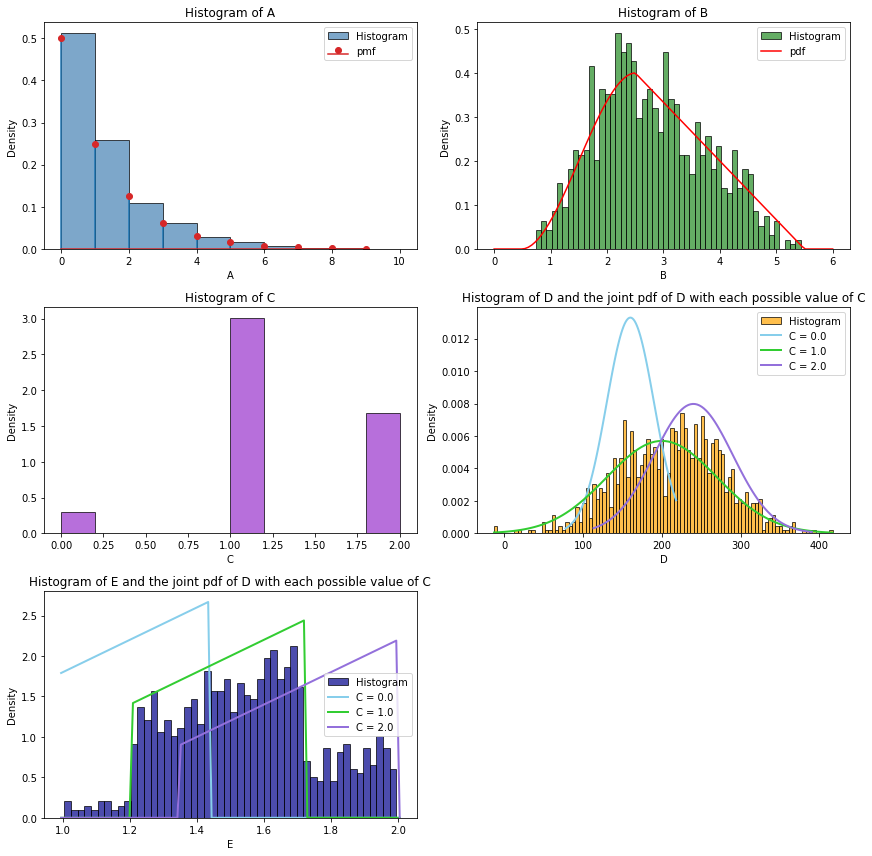

In [15]:
test_population = generate_population(1000)
plot_population(test_population)


<span style="color:red">**18**</span>. Similar to step 17, generate a population of 1000000 patients. **This will be your hypothetical population to be analyzed in the next tasks.** Compute and print the random variable means and variances for this population using <u><b><span style="color:green">numpy.mean</span></b></u> and <u><b><span style="color:green">numpy.var</span></b></u>

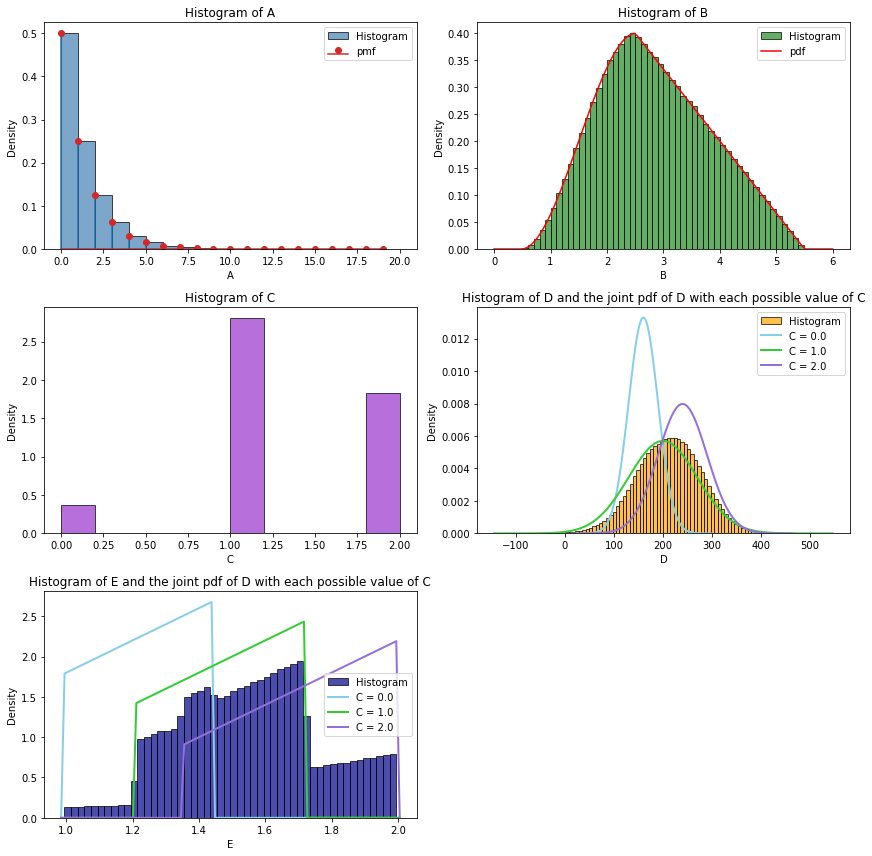

36.58920589037273
6847.064373872013


In [16]:
population = generate_population(1000000)
plot_population(population)
print(np.mean(population))
print(np.var(population))


<span style="color:blue">**19**</span>. Copy your figures from steps 17 and 18 into your report so that the two plots for each variable are side by side. You should observe that when the number of generated patients increases, the population statistics converge to the actual PMF/PDF.

### Answer it in your report!

### TASK 2: Sampling and Descriptive Statistics
<br>
<br>
Your second task is to take samples from your population and compute and visualize some descriptive statistics for each sample. If you fail to accomplish Task 1, you can load the <u><b>population.txt</b></u> file provided along with this assignment as a NumPy array using <u><b><span style="color:green">numpy.loadtxt.</span></b></u>
<br>
<br>
Firstly, you have to implement the sampler function to take samples from the population. You are <u><b>not allowed</b></u> to use any number generator function other than <u><b><span style="color:green">numpy.random.random</span></b></u>. Next, you must implement estimators for the population mean and variance. You are <u><b>not allowed</b></u> to use <u><b><span style="color:green">numpy.mean</span></b></u>, <u><b><span style="color:green">numpy.std</span></b></u>, or <u><b><span style="color:green">numpy.var</span></b></u> functions. To have a better insight into the performances of these estimators, you should take multiple samples to estimate from and plot the histograms of the estimations with indicators for the actual population mean and variance.
<br>
<br>
Here are the detailed steps:

<span style="color:red">**1**</span>. Implement a function (**random_sample**) that takes a population and a sample size (n) as inputs and returns a random sample of that population with dimensions of nx6 where the random variables appear in the same order as the population.
<br>
<br>
<u>For the next steps, a column of that population sample (nx1) will be referred to as a <b>sample.</b><u>
The first column is a sample of A; the second column is a sample of B, and so on.

In [17]:
def random_sample(population, sample_size):
    random_sample = []
    for i in range(sample_size):
        i = np.random.random()*len(population)
        random_sample.append(int(i))
    return population[random_sample]

<span style="color:red">**2**</span>. Implement a function (**estimate_mean**) that estimates the population mean of a variable with
its sample mean. It should take a sample and return an estimation for the mean.

In [18]:
def estimate_mean(sample):
    return np.sum(sample, axis=0) / len(sample)

<span style="color:red">**3**</span>. Implement a function (**estimate_variance_1**) that estimates the population variance of a
variable using its sample with the formula below. It should take a sample and return an estimation for the variance.
<br>
<br>
$$s^2 = ∑_{i=1}^N (X_i - \bar{X})^2 / (n-1)$$

In [19]:
def estimate_variance_1(sample):
    sample_mean = estimate_mean(sample)
    squared_deviations = [(value - sample_mean) ** 2 for value in sample]
    return sum(squared_deviations) / (len(sample) - 1)

<span style="color:red">**4**</span>. Implement a function (**estimate_variance_2**) that estimates the population variance for a variable using its sample with the formula below. It should take a sample and return an estimation for the variance.
<br>
<br>
$$s^2 = ∑_{i=1}^N (X_i - \bar{X})^2 / n$$

In [20]:
def estimate_variance_2(sample):
    sample_mean = estimate_mean(sample)
    squared_deviations = [(value - sample_mean) ** 2 for value in sample]
    return sum(squared_deviations) / len(sample) 

<span style="color:red">**5**</span>. Implement a function (**descriptive_stats**) that takes a population, sample size (n), number of sampling (m), and variable index as input. It returns lists of estimated means and variances of type 1 and type 2 using the previously implemented functions. In other words, it should take a sample of size n from the population m times and create descriptive statistics lists of length m for the variable at the given index.

In [21]:
def descriptive_stats(population, sample_size, num_sampling, var):
    est_means = np.zeros(num_sampling)
    est_variances_1 = np.zeros(num_sampling)
    est_variances_2 = np.zeros(num_sampling)

    for i in range(num_sampling):
        sample = random_sample(population, sample_size)
        est_means[i] = estimate_mean(sample)[var]
        est_variances_1[i] = estimate_variance_1(sample)[var]
        est_variances_2[i] = estimate_variance_2(sample)[var]

        
    return (est_means, est_variances_1, est_variances_2)

<span style="color:blue">**6**</span>. Calculate the theoretical mean and variance of variable A.

### Answer it in your report!

<span style="color:red">**7**</span>. Call the **descriptive_stats** function for variable A with the sample size as 100 and the number of samples as 10000.
<br>
<br>
* a. In the same figure, plot the histogram of the estimated means, a vertical line at the average of the estimated means, and a vertical line at the theoretical mean.
* b. In the same figure, plot the histogram of the estimated variances of type 1, a vertical line at the average of the estimated variances of type 1, and a vertical line at the theoretical variance.
* c. In the same figure, plot the histogram of the estimated variances of type 2, a vertical line at the average of the estimated variances of type 2, and a vertical line at the theoretical variance.

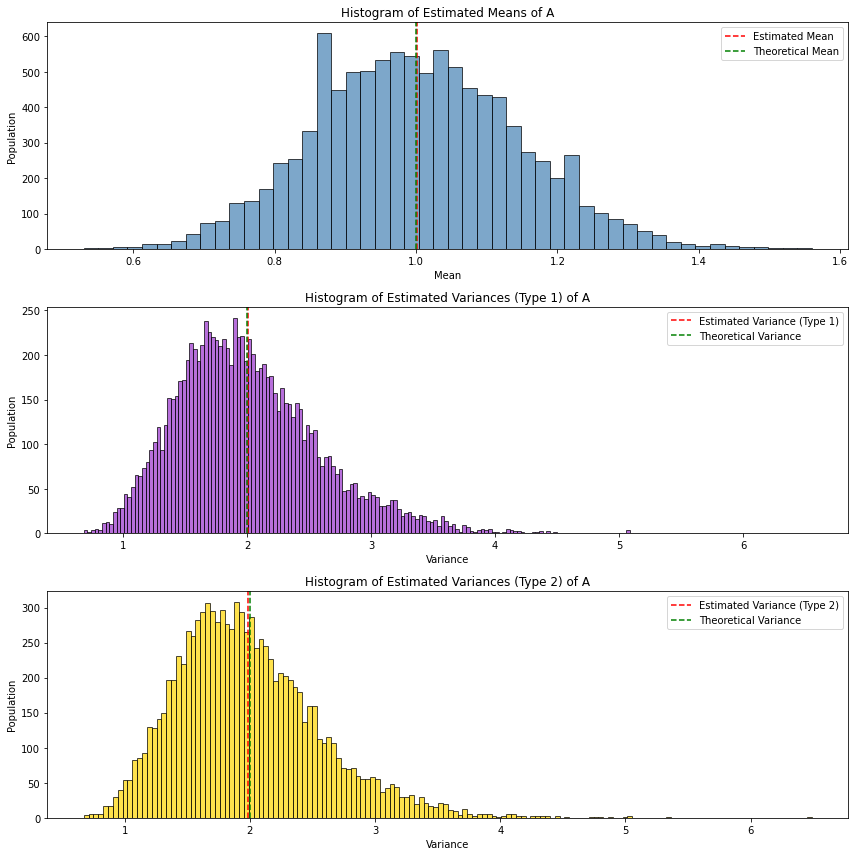

In [22]:

sample_size = 100
num_samples = 10000
est_means, est_variances_1, est_variances_2 = descriptive_stats(population, sample_size, num_samples, 0) 


theoretical_mean = estimate_mean(population)[0]
theoretical_variance = estimate_variance_2(population)[0]



plt.figure(figsize=(12, 12))
plt.subplot(3, 1, 1)
plt.hist(est_means, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
plt.axvline(x=estimate_mean(est_means), color='red', linestyle='--', label='Estimated Mean')
plt.axvline(x=theoretical_mean, color='green', linestyle='--', label='Theoretical Mean')
plt.title("Histogram of Estimated Means of A")
plt.xlabel("Mean")
plt.ylabel("Population")
plt.legend()


plt.subplot(3, 1, 2)
plt.hist(est_variances_1, bins=200, color='darkorchid', edgecolor='black', alpha=0.7)
plt.axvline(x=estimate_mean(est_variances_1), color='red', linestyle='--', label='Estimated Variance (Type 1)')
plt.axvline(x=theoretical_variance, color='green', linestyle='--', label='Theoretical Variance')
plt.title("Histogram of Estimated Variances (Type 1) of A")
plt.xlabel("Variance")
plt.ylabel("Population")
plt.legend()


plt.subplot(3, 1, 3)
plt.hist(est_variances_2, bins=150, color='gold', edgecolor='black', alpha=0.7)
plt.axvline(x=estimate_mean(est_variances_2), color='red', linestyle='--', label='Estimated Variance (Type 2)')
plt.axvline(x=theoretical_variance, color='green', linestyle='--', label='Theoretical Variance')
plt.title("Histogram of Estimated Variances (Type 2) of A")
plt.xlabel("Variance")
plt.ylabel("Population")
plt.legend()

plt.tight_layout()
plt.show()

<span style="color:blue">**8**</span>. Copy your figures from step 7 into your report. What do the figures analyze? What is your conclusion?

### Answer it in your report!

<span style="color:red">**9**</span>. Call the **descriptive_stats** function for variable A with the sample size as (100, 200, 300, …,5000) and the number of samples as 500. Compute the variances of the estimated means and the estimated variances of type 1 for each sample size and create the sample size v.s. variance plot for both of them in the same figure.

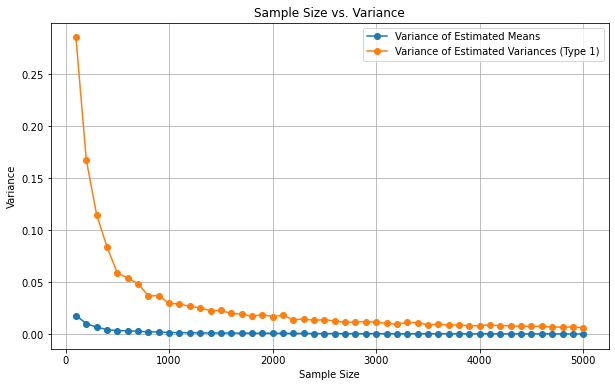

In [23]:
sample_sizes = range(100, 5001, 100)

variances_means = np.zeros(len(sample_sizes))
variances_type1 = np.zeros(len(sample_sizes))

for i, sample_size in enumerate(sample_sizes):
    num_samples = 500

    est_means, est_variances_1, _ = descriptive_stats(population, sample_size, num_samples, 0)  

    variances_means[i] = estimate_variance_2(est_means.reshape(est_means.shape[0], 1))
    variances_type1[i] = estimate_variance_2(est_variances_1.reshape(est_variances_1.shape[0], 1))


plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, variances_means, label='Variance of Estimated Means', marker='o')
plt.plot(sample_sizes, variances_type1, label='Variance of Estimated Variances (Type 1)', marker='o')
plt.xlabel('Sample Size')
plt.ylabel('Variance')
plt.title('Sample Size vs. Variance')
plt.legend()
plt.grid(True)
plt.show()

<span style="color:blue">**10**</span>. Copy your figure from step 9 into your report. What does this figure analyze? What is your conclusion?

### Answer it in your report!

### TASK 3: Parameter Estimation
<br>
<br>
Your third task is to estimate some of the distribution parameters using the Method of Moments and the Method of Maximum Likelihood.
<br>
<br>
Here are the detailed steps:

<span style="color:blue">**1**</span>. For variable D, search online and find out about the Maximum Likelihood estimation of the normal distribution parameters. Add these findings to your report.

### Answer it in your report!

<span style="color:red">**2**</span>. Implement a function (**estimate_mml_d**) that takes a sample of D and returns the Method of Maximum Likelihood estimations for μ and σ. You can use previously implemented functions.

In [24]:
def estimate_mml_d(sample):
    x = sample[:, 3]
    mu = np.sum(x) / len(x)
    sigma = np.sqrt(estimate_variance_2(x))
    return mu, sigma


<span style="color:blue">**3**</span>. For variable E, calculate the estimators for its parameters i and j using the Method of Moments. As a result of your calculations, you should reach a point where you have 𝑓(𝑗) = 0 equation such that f is a function with fractional exponents and g(j)=i where g is another
function to calculate i using j.

### Answer it in your report!

<span style="color:red">**4**</span>. Implement a function (**estimate_mom_e**) that takes a sample of E and returns the Method of Moments estimations for i and j. You should use **sympy**’s solver to find j using the following code where you have to replace f(j) with your function expression:
```python
j = sympy.S('j')
sol = sympy.solve(f(j), j)
ind = 0
while True:
    j = float(sol[ind].as_real_imag()[0])
    ind += 1
    if j >= 0:
        break
```
After this point, you should be able to compute i using g(j).

In [25]:
def estimate_mom_e(sample):
    sample  = sample[:,4]
    j = sp.S('j')
    i = sp.S('i')
    m1 = 0
    m2 = 0
    for i in sample:
        m1 += i
        m2 += i**2
    m1 /= len(sample)
    m2 /= len(sample)
    def f(j,m1,m2):
        return (16*j**(3/2)*(j + 1)**(3/2))/9 - m2 - j/3 - (8*j**(3/2)*(j + 1)**(5/2))/9 + (8*j**(5/2)*(j + 1)**(3/2))/9 - (4*j**2)/3 - (8*j**3)/9 + m1**2 + (4*m1*(j + 1)**(3/2))/3 - (4*m1*(j + 1)**(5/2))/3 + (4*j*m1*(j + 1)**(3/2))/3 + 1/18
    def i(j):
        return m1 - 2/3*(-j**(3/2) + sp.sqrt(j + 1)*j + sp.sqrt(j + 1))

    sol = sp.solve(f(j,m1,m2), j)
    ind = 0
    while True:
        j = float(sol[ind].as_real_imag()[0])
        ind += 1
        if j >= 0:
            break 
    i = i(j)
    return i, j

<span style="color:blue">**5**</span>. For variable H, compute the estimator for its parameters k and l using the Method of Maximum Likelihood.

### Answer it in your report!

<span style="color:red">**6**</span>. Implement a function (**estimate_mml_h**) that takes a sample of H and returns the Method of Maximum Likelihood estimations for k.

In [26]:
def estimate_mml_h(sample):
    x = sample[:, 5]
    k = sp.S("k")
    expression = 1
    for s in x :
        expression = expression * pdf_h(s, k, 1-k) 
    expression = sp.log(expression)
    expression = sp.diff(expression, k)
    k = sp.solve(expression)
    return k[0], 1-k[0]


<span style="color:red">**7**</span>. Implement a function (**parameter_estimation**) that takes a population, sample size (n), the number of sampling (m) and patient category as input. Using the previously implemented functions, it samples from <u>a subset of the population where the patient is in the given category</u> and returns lists of estimated parameters of variables D, E, and H.

In [27]:
def parameter_estimation(population, sample_size, num_sampling, c):
    est_dmu = np.array([])
    est_dsigma = np.array([])
    est_ei = np.array([])
    est_ej = np.array([])
    est_hk = np.array([])
    est_hl = np.array([])
    for i in range(num_sampling):
        sample_mask = population[:,2] == c
        new_population = population[sample_mask]
        sample = random_sample(new_population, sample_size)

        est_mu, est_sigma = estimate_mml_d(sample)
        est_dmu = np.append(est_dmu, est_mu)
        est_dsigma = np.append(est_dsigma, est_sigma)

        est_i, est_j = estimate_mom_e(sample)
        est_ei = np.append(est_ei, est_i)
        est_ej = np.append(est_ej, est_j)

        est_k, est_l = estimate_mml_h(sample)
        est_hk = np.append(est_hk, est_k)
        est_hl = np.append(est_hl, est_l)
        
    return est_dmu, est_dsigma, est_ei, est_ej, est_hk, est_hl



<span style="color:red">**8**</span>. Call the parameter_estimation function for the “very risky” patient category with the sample size as 100 and the number of samples as 1000.
* a. In the same figure, plot the histogram of the estimated i parameter of E, a vertical line at the average of the estimations, and a vertical line at the actual i value.
* b. In the same figure, plot the histogram of the estimated j parameter of E, a vertical line at the average of the estimations, and a vertical line at the actual i value.
* c. In the same figure, plot the histogram of the estimated k parameter of H, a vertical line at the average of the estimations, and a vertical line at the actual i value.
* d. In the same figure, plot the histogram of the estimated i parameter of H, a vertical line at the average of the estimations, and a vertical line at the actual i value.

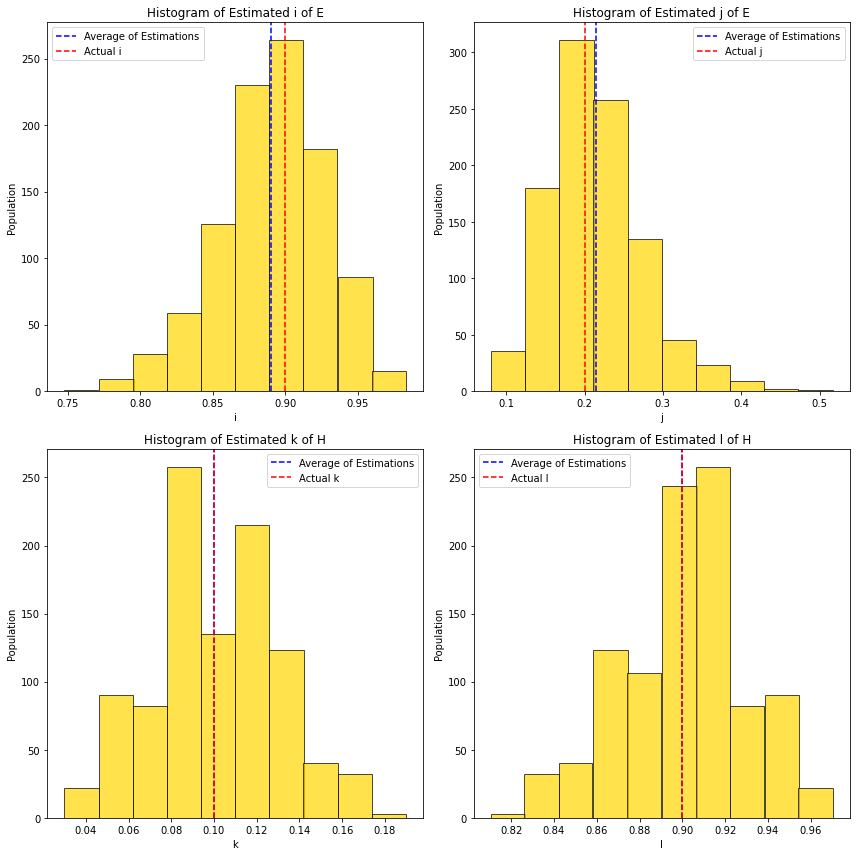

In [28]:

sample_size = 100
num_sampling = 1000

est_dmu, est_dsigma, est_ei, est_ej, est_hk, est_hl = parameter_estimation(population, sample_size, num_sampling, 2)

i = 0.9
j = 0.2
k = 0.1
l = 0.9
mu = 240
sigma = 50

plt.figure(figsize=(12, 12))


plt.subplot(2, 2, 1)
plt.hist(est_ei.astype(np.float16), color='gold', edgecolor='black', alpha=0.7)
plt.axvline(estimate_mean(est_ei), color='blue', linestyle='--', label='Average of Estimations')
plt.axvline(i, color='red', linestyle='--', label='Actual i')
plt.title("Histogram of Estimated i of E")
plt.xlabel("i")
plt.ylabel("Population")
plt.legend()


plt.subplot(2, 2, 2)
plt.hist(est_ej.astype(np.float16), color='gold', edgecolor='black', alpha=0.7)
plt.axvline(estimate_mean(est_ej), color='blue', linestyle='--', label='Average of Estimations')
plt.axvline(j, color='red', linestyle='--', label='Actual j')
plt.title("Histogram of Estimated j of E")
plt.xlabel("j")
plt.ylabel("Population")
plt.legend()


plt.subplot(2, 2, 3)
plt.hist(est_hk.astype(np.float16), color='gold', edgecolor='black', alpha=0.7)
plt.axvline(estimate_mean(est_hk), color='blue', linestyle='--', label='Average of Estimations')
plt.axvline(k, color='red', linestyle='--', label='Actual k')
plt.title("Histogram of Estimated k of H")
plt.xlabel("k")
plt.ylabel("Population")
plt.legend()


plt.subplot(2, 2, 4)
plt.hist(est_hl.astype(np.float16), color='gold', edgecolor='black', alpha=0.7)
plt.axvline(estimate_mean(est_hl), color='blue', linestyle='--', label='Average of Estimations')
plt.axvline(l, color='red', linestyle='--', label='Actual l')
plt.title("Histogram of Estimated l of H")
plt.xlabel("l")
plt.ylabel("Population")
plt.legend()

plt.tight_layout()
plt.show()


<span style="color:blue">**9**</span>. Copy your figures from step 8 into your report.

### Answer it in your report!

### TASK 4: Confidence intervals
<br>
<br>
Your fourth task is to calculate confidence intervals for the population mean of variable A.
<br>
<br>
Here are the detailed steps:

<span style="color:red">**1**</span>. Implement a function (**calc_conf_int_mean**) that takes a population, sample size (n), variable index, population standard deviation for that variable, and the confidence level as input. Using a look-up dictionary for quantiles z<sub>0.1</sub>, z<sub>0.05</sub>, z<sub>0.025</sub>, z<sub>0.01</sub>, and z<sub>0.05</sub>, it computes and returns a confidence interval for the population mean of the requested variable.

In [29]:
def calc_conf_int_mean(population, sample_size, var, pop_std, conf_lvl):
    z = {0.1: 1.282, 0.05: 1.645, 0.025: 1.96, 0.01: 2.326, 0.005: 2.576}
    used_value = round((1 - conf_lvl)/2, 3)
    z_value = z[used_value]
    sample = random_sample(population, sample_size)
    mean = estimate_mean(sample[:, var])
    standard_error = pop_std/np.sqrt(sample_size)
    margin_of_error = z_value * standard_error
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    conf_int = (lower_bound, upper_bound)  
    return conf_int

<span style="color:red">**2**</span>. For random variable A and sample size of 1000, compute the confidence intervals for 20 different samples for both confidence levels as 0.98 and 0.8, using the calc_conf_int_mean function.
* a. In the same figure, plot the computed confidence intervals for level 0.98, confidence intervals for level 0.8, and a vertical line at the actual population mean for A.

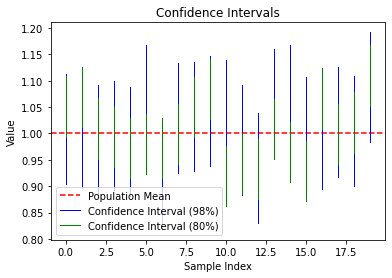

In [30]:
sample_size = 1000
confidence_levels = [0.98, 0.8]
num_sampling = 20
std = np.sqrt(estimate_variance_1(population[:,0]))


samples = [random_sample(population, sample_size) for _ in range(num_sampling)]
conf_intervals_1 = [calc_conf_int_mean(sample, sample_size, 0, std, confidence_levels[0]) for sample in samples]
conf_intervals_2 = [calc_conf_int_mean(sample, sample_size, 0, std, confidence_levels[1]) for sample in samples]


fig, ax = plt.subplots()
ax.axhline(y=estimate_mean(population[:,0]), color='r', linestyle='--', label='Population Mean')
for i in range(num_sampling-1):
    ax.plot([i, i], conf_intervals_1[i], color='blue', linewidth=1)
    ax.plot([i, i], conf_intervals_2[i], color='green', linewidth=1)


ax.plot([19,19], conf_intervals_1[19], color='blue', linewidth=1, label='Confidence Interval (98%)')
ax.plot([19,19], conf_intervals_2[19], color='green', linewidth=1, label='Confidence Interval (80%)')


ax.set_xlabel('Sample Index')
ax.set_ylabel('Value')
ax.set_title('Confidence Intervals')
ax.legend()
plt.show()


<span style="color:blue">**3**</span>. Copy your figure from step 2 into your report. How do the confidence intervals change with respect to the confidence levels? Comment on your findings.

### Answer it in your report!

<span style="color:red">**4**</span>. For random variable A and a confidence level of 0.9, compute the confidence intervals for the sample size of [ 100, 400, …, 4900] using the calc_conf_int_mean function.
* a. In the same figure, plot the computed confidence intervals with varying sample sizes and a vertical line at the actual population mean for A.

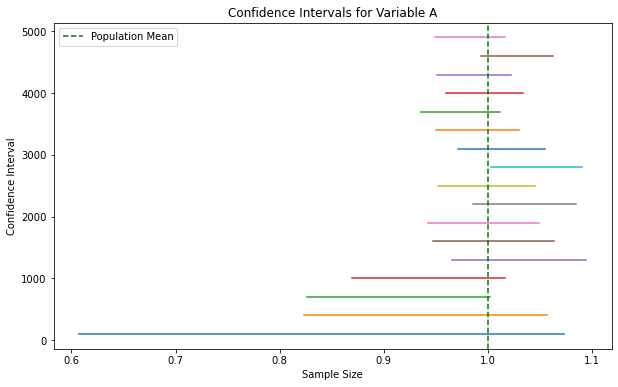

In [31]:
population_std_A = np.sqrt(estimate_variance_1(population[:,0]))
confidence_level = 0.9
sample_sizes = np.arange(100, 5000, 300)

lower_bounds = []
upper_bounds = []

for sample_size in sample_sizes:
    conf_int = calc_conf_int_mean(population, sample_size, 0, population_std_A, confidence_level)
    lower_bounds.append(conf_int[0])
    upper_bounds.append(conf_int[1])

plt.figure(figsize=(10, 6))
for i in range(len(lower_bounds)):
    plt.plot([lower_bounds[i], upper_bounds[i]], [sample_sizes[i], sample_sizes[i]])
    
plt.axvline(estimate_mean(population[:,0]), color='g', linestyle='--', label='Population Mean')
plt.xlabel('Sample Size')
plt.ylabel('Confidence Interval')
plt.title('Confidence Intervals for Variable A')
plt.legend()
plt.show()

<span style="color:blue">**5**</span>. Copy your figure from step 4 into your report. How do the confidence intervals change with respect to the sample sizes? Comment on your findings.

### Answer it in your report!

### TASK 5: Hypothesis testing
<br>
<br>
<span style="color:blue"><b>Your fifth task</b></span> is to do hypothesis testing for the case given below. The answer should only be included in your report.
<br>
<br>
After a year-long national publicity campaign on physical fitness, a hospital embarks on a mission to determine if the campaign has been effective. For this purpose, they survey 500 randomly selected patients and find out that their average exercise frequency is now 1.2. Assuming that the standard deviation of exercise frequency has not changed, does this mean that, at a 3% significance level, the mean number of times a patient engages in physical exercise each week has increased? Explain your steps clearly.

### Answer it in your report!

### TASK 6: Naive Bayes classifier
<br>
<br>
Your last task is to apply and evaluate the Naive Bayes classifier for our population.
<br>
<br>
Here are the detailed steps:

<span style="color:red">**1**</span>. Implement a function (**estimate_parameters**) that takes a population sample, and using the previously implemented functions, it estimates and returns the category-conditioned probability distribution parameters of variables D, E, and H and prior category probabilities (3x2 for D and E, and 3 for C and H, in total 18 parameters).

In [37]:
def estimate_parameters(pop_sample):
    
    class_for_not_risky = pop_sample[pop_sample[:,2] == 0]
    class_for_risky = pop_sample[pop_sample[:,2] == 1]
    class_for_very_risky = pop_sample[pop_sample[:,2] == 2]

    est_dmu_for_not_risky, est_dsimga_for_not_risky = estimate_mml_d(class_for_not_risky)
    est_dmu_for_risky, est_dsimga_for_risky = estimate_mml_d(class_for_risky)
    est_dmu_for_very_risky, est_dsimga_for_very_risky = estimate_mml_d(class_for_very_risky)

    est_ei_for_not_risky, est_ej_for_not_risky = estimate_mom_e(class_for_not_risky)
    est_ei_for_risky, est_ej_for_risky = estimate_mom_e(class_for_risky)
    est_ei_for_very_risky, est_ej_for_very_risky = estimate_mom_e(class_for_very_risky)

    est_hk_for_not_risky, est_hl_for_not_risky = estimate_mml_h(class_for_not_risky)
    est_hk_for_risky, est_hl_for_risky = estimate_mml_h(class_for_risky)
    est_hk_for_very_risky, est_hl_for_very_risky = estimate_mml_h(class_for_very_risky)

    num_samples = len(pop_sample)
    p_c0 = len(class_for_not_risky)/num_samples
    p_c1 = len(class_for_risky)/num_samples
    p_c2 = len(class_for_very_risky)/num_samples
    
    est_d0 = (est_dmu_for_not_risky, est_dsimga_for_not_risky)
    est_d1 = (est_dmu_for_risky, est_dsimga_for_risky)
    est_d2 = (est_dmu_for_very_risky, est_dsimga_for_very_risky)
    
    est_e0 = (est_ei_for_not_risky, est_ej_for_not_risky)
    est_e1 = (est_ei_for_risky, est_ej_for_risky)
    est_e2 = (est_ei_for_very_risky, est_ej_for_very_risky)

    est_h0 = est_hk_for_not_risky
    est_h1 = est_hk_for_risky
    est_h2 = est_hk_for_very_risky
   
    return est_d0, est_d1, est_d2, est_e0, est_e1, est_e2, est_h0, est_h1, est_h2, p_c0, p_c1, p_c2

<span style="color:blue">**2**</span>. Derive the formula for the posterior probability of each patient category (C) given D, E, and H.

### Answer it in your report!

<span style="color:red">**3**</span>. Implement a function (**calc_posterior**) that takes the cholesterol level (d), systolic blood pressure (e), and Hemoglobin A1c (HbA1c) level (h) of a patient and the distribution parameters estimated using the estimate_parameters function. Using the Bayes Rule, it computes and returns patient category (C) probabilities.

In [38]:
def calc_posterior(d, e, h, params):
    est_d0, est_d1, est_d2, est_e0, est_e1, est_e2, est_h0, est_h1, est_h2, p_c0, p_c1, p_c2 = params
    P0 = p_c0 * pdf_d(d, est_d0[0], est_d0[1]) * pdf_e(e, est_e0[0], est_e0[1]) * pdf_h(h, est_h0, 1- est_h0)
    P1 = p_c1 * pdf_d(d, est_d1[0], est_d1[1]) * pdf_e(e, est_e1[0], est_e1[1]) * pdf_h(h, est_h1, 1- est_h1)
    P2 = p_c2 * pdf_d(d, est_d2[0], est_d2[1]) * pdf_e(e, est_e2[0], est_e2[1]) * pdf_h(h, est_h2, 1- est_h2)

    return P0, P1, P2

<span style="color:red">**4**</span>. Create a sample of size 10000 for training. Training means that the patient categories are known (labeled) and will be used for estimating the category-conditioned probability distribution parameters.

In [39]:
import random
randomIndex = random.sample(range(len(population)), 11000 )
training_set = population[randomIndex[:1000], 2:]


<span style="color:red">**5**</span>. Create a sample size of 1000 for testing. Testing means that the patient categories are to be predicted. They will be determined as the category with the maximum posterior probability.

In [40]:
test_set = population[randomIndex[-1000:], 2:]

<span style="color:red">**6**</span>. Using the training sample, compute the category-conditioned probability distribution parameters.

In [41]:
extra_array = np.ones((len(training_set), 2))
new_training_set = np.concatenate((extra_array,training_set), axis=1)
params = estimate_parameters(new_training_set)
est_d0, est_d1, est_d2, est_e0, est_e1, est_e2, est_h0, est_h1, est_h2, p_c0, p_c1, p_c2 = params

print('Estimated parameters for class 0: ', "D0:", est_d0, "E0:", est_e0, "H0:", est_h0)
print('Estimated parameters for class 1: ', "D1:", est_d1, "E1:", est_e1, "H1:", est_h1)
print('Estimated parameters for class 2: ', "D2:", est_d2, "E2:", est_e2, "H2:", est_h2)
print('Prior probabilities: ', "P0:", p_c0, "P1:", p_c1, "P2:", p_c2)
    
    
    


Estimated parameters for class 0:  D0: (160.98192865776653, 31.409800520975626) E0: (0.0998686690487109, 0.8412503874331557) H0: 23/34
Estimated parameters for class 1:  D1: (203.2192823252693, 73.26499478804585) E1: (0.499219725586291, 0.4975781751128642) H1: 25/61
Estimated parameters for class 2:  D2: (240.7939105486446, 47.40785083597165) E2: (0.912469065174841, 0.18627974798775476) H2: 52/383
Prior probabilities:  P0: 0.068 P1: 0.549 P2: 0.383


<span style="color:red">**7**</span>. For each patient in the test sample, compute the posterior probability for each category using the corresponding d, e, and h values and the previously estimated distribution parameters. Determine the category of the patient as the one with the highest posterior probability. Compare the estimated and the actual categories to check if the classification was correct. In 1000 tests, compute and print the ratio of the correctly classified patients.

In [42]:
extra_array2 = np.ones((len(test_set), 2))
new_test_set = np.concatenate((extra_array2,test_set), axis=1)
params2 = estimate_parameters(new_test_set)
correct = 0
for i in range(len(new_training_set)):
    posterior = calc_posterior(new_test_set[i][3], new_test_set[i][4], new_test_set[i][5], params2)
    if np.argmax(posterior) == new_test_set[i][2]:
        correct += 1
ratio = 100*correct/len(new_training_set)
print(f"The ratio of the correctly classified patients are {ratio}%.")

The ratio of the correctly classified patients are 77.1%.
